<a href="https://colab.research.google.com/github/jayro0414/Stock-Price-Prediction/blob/main/stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [93]:
df = web.DataReader('AApl', data_source='yahoo', start='2012-04-01', end='2021-04-01')

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-04-02,22.098928,21.442142,21.493929,22.093929,598351600.0,19.030903
2012-04-03,22.578930,22.232500,22.403570,22.475714,834559600.0,19.359755
2012-04-04,22.352142,22.035713,22.298214,22.296785,572980800.0,19.205635
2012-04-05,22.666430,22.264286,22.392143,22.631430,641298000.0,19.493883
2012-04-09,22.851429,22.332144,22.361786,22.722500,597536800.0,19.572329
...,...,...,...,...,...,...
2021-03-26,121.480003,118.919998,120.349998,121.209999,94071200.0,121.209999
2021-03-29,122.580002,120.730003,121.650002,121.389999,80819200.0,121.389999
2021-03-30,120.400002,118.860001,120.110001,119.900002,85671900.0,119.900002


In [94]:
df.shape

(2265, 6)

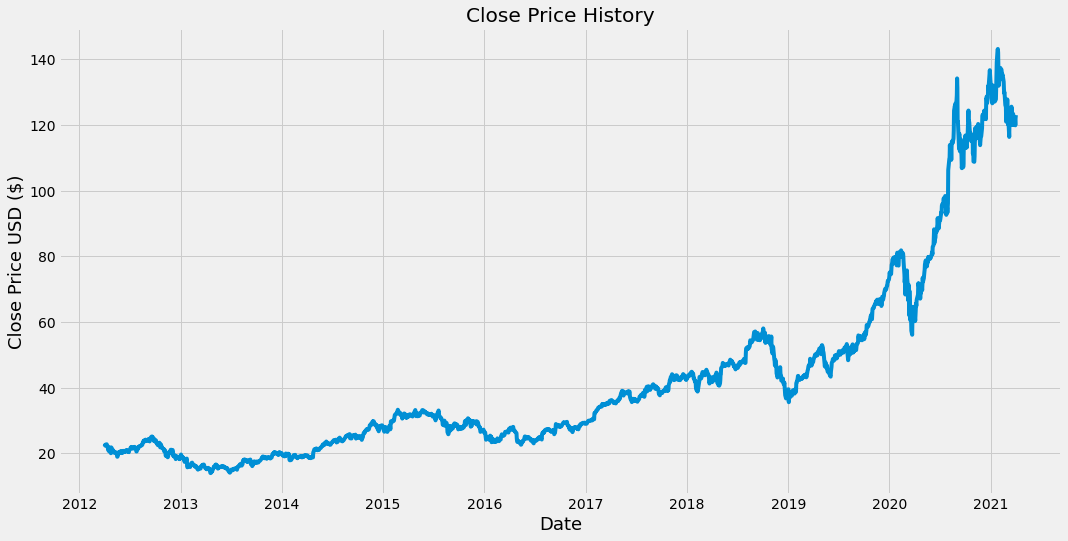

In [95]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [96]:
#Creating a new dataframe with only the 'Close' column
data = df.filter(['Close'])

#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model (80% of the dataset)
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1812

In [97]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.06304676],
       [0.06600146],
       [0.0646167 ],
       ...,
       [0.81998644],
       [0.83739962],
       [0.84397792]])

In [98]:
#Create the training dataset
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]

#Split the data into x_trian and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

In [99]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [100]:
#Reshape the data (2d -> 3d)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1752, 60, 1)

In [101]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [102]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [103]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1752/1752 [==============================] - 47s 25ms/step - loss: 6.6811e-04


In [104]:
#Create the testing dataset
#Create a new array containing scaled values that was not trained
test_data = scaled_data[training_data_len - 60: , :]

#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [105]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [106]:
#Reshape the data (2d -> 3d)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [107]:
#Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [108]:
#Get the root mean squared error
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.1695204644276869

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<function matplotlib.pyplot.show>

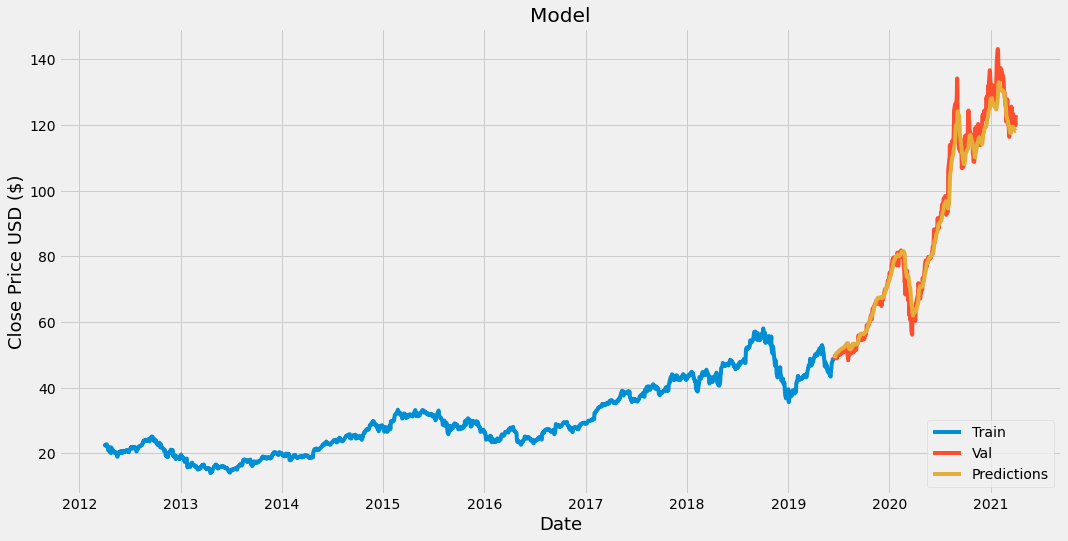

In [109]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show

In [110]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-06-17,48.472500,48.964272
2019-06-18,49.612499,49.220032
2019-06-19,49.467499,49.536720
2019-06-20,49.865002,49.830162
2019-06-21,49.695000,50.125465
...,...,...
2021-03-26,121.209999,118.636391
2021-03-29,121.389999,118.440643
2021-03-30,119.900002,118.330132


In [111]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-04-01', end='2021-04-01')

#Create a new dataframe
new_df = apple_quote.filter(['Close'])

#Get the last 60 day closing price and convert the dataframe to an array
last_60_days = new_df[-60:].values

#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#Create an empty list
X_test = []

#Append
X_test.append(last_60_days_scaled)

#Convert the X_test dataset to a numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Get the predicted scale price
pred_price = model.predict(X_test)

#Undo the Scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[118.33478]]


In [112]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2021-04-01', end='2021-04-01')
print(apple_quote2['Close'])

Date
2021-04-01    123
Name: Close, dtype: int64
